We want to load the following dataset from UCSC Cell Browser

- **Lab:** Kriegstein
- **Publication:** Velmeshev et al. Science. 2019.
- **PubMed Abstract:** 31097668
- **NCBI Bioproject:** PRJNA434002
- **Submitted by:** Dmitry Velmeshev (2019-10-18), Version 3
- **Direct link to this plot for manuscripts:** [https://autism.cells.ucsc.edu](https://autism.cells.ucsc.edu)

<u>Filelinks:</u>
- **Matrix**: [exprMatrix.tsv.gz](https://cells.ucsc.edu/autism/exprMatrix.tsv.gz). Values in matrix are: 10x UMI counts from cellranger, log2-transformed
- **Raw count matrix:** [rawMatrix.zip](https://cells.ucsc.edu/autism/rawMatrix.zip). Matrix with raw read counts, includes a copy of the meta data
- **Cell meta annotations:** [meta.tsv](https://cells.ucsc.edu/autism/meta.tsv)
- **Dimensionality reduction coordinates:** [tSNE.coords.tsv.gz](https://cells.ucsc.edu/autism/tSNE.coords.tsv.gz)

# Global environment

## Imports

In [1]:
import scanpy as sc
import pandas as pd
import decoupler as dc

## Global variables

In [2]:
data_dir = "data/velmeshev"

## Load data

Load raw count for velmeshev dataset

In [3]:
adata = sc.read_10x_mtx(data_dir)
adata

/env/lib/python3.11/site-packages/anndata/utils.py:268: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


AnnData object with n_obs × n_vars = 104559 × 65217
    var: 'gene_ids'

Load cell metadata

In [4]:
metadata = pd.read_csv(f"{data_dir}/meta.txt", sep="\t", index_col=0)
metadata.head()

,cluster,sample,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post-mortem interval (hours),RNA Integrity Number,genes,UMIs,RNA mitochondr. percent,RNA ribosomal percent
cell,,,,,,,,,,,,,,,
AAACCTGGTACGCACC-1_1823_BA24,Neu-NRGN-II,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,622,774,2.454780,1.421189
AAACGGGCACCAGATT-1_1823_BA24,L5/6,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,6926,24042,0.445055,0.428417
AAAGATGAGTCCAGGA-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,624,830,0.240964,0.722892
AAAGATGTCTTGAGGT-1_1823_BA24,OPC,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,1192,1771,0.225861,1.806889
AAAGCAAGTAATCACC-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,691,895,0.558659,0.670391


Load t-sne embedding

In [5]:
tsne = pd.read_csv(f"{data_dir}/tSNE.coords.tsv", sep="\t", index_col=0, header=None)
tsne.head()

,1,2
0,,
AAACCTGGTACGCACC-1_1823_BA24,25.386422,8.993565
AAACGGGCACCAGATT-1_1823_BA24,5.309490,-13.870382
AAAGATGAGTCCAGGA-1_1823_BA24,2.120656,9.641835
AAAGATGTCTTGAGGT-1_1823_BA24,19.910425,-11.115421
AAAGCAAGTAATCACC-1_1823_BA24,5.299070,11.440932


# Process data

Attach annotation

In [6]:
adata.obs = metadata
adata.obsm["X_tsne"] = tsne.values
adata

AnnData object with n_obs × n_vars = 104559 × 65217
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'
    var: 'gene_ids'
    obsm: 'X_tsne'

Subset only healthy patients

In [7]:
adata = adata[(adata.obs.diagnosis == "Control") & (adata.obs.region == "PFC")].copy()
adata

AnnData object with n_obs × n_vars = 30147 × 65217
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'
    var: 'gene_ids'
    obsm: 'X_tsne'

... storing 'cluster' as categorical
... storing 'sample' as categorical
... storing 'region' as categorical
... storing 'sex' as categorical
... storing 'diagnosis' as categorical
... storing 'Capbatch' as categorical
... storing 'Seqbatch' as categorical


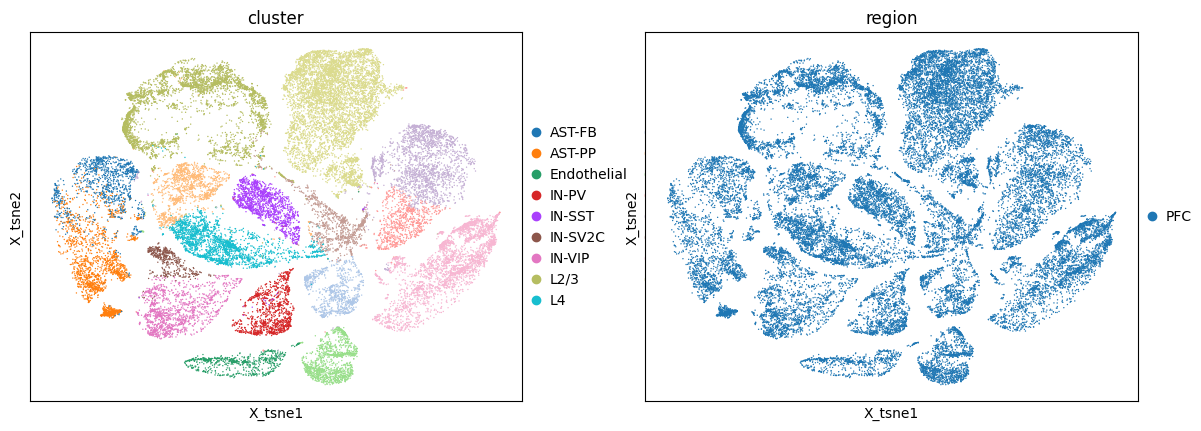

In [8]:
sc.pl.embedding(adata, basis="X_tsne", color=["cluster", "region"])

Save AnnData object

In [9]:
adata.write_h5ad("data/raw_adata/velmeshev.h5ad")

Create pseudobulks

In [10]:
pdata = dc.pp.pseudobulk(
    adata,
    sample_col='sample',
    groups_col=['cluster', 'region'],
    mode="mean"
)

Count number of pseudobulk samples per celltype

In [11]:
pdata.obs["cluster"].value_counts()

cluster
OPC                 11
AST-FB              10
AST-PP              10
IN-PV               10
Endothelial         10
IN-SV2C             10
IN-VIP              10
L2/3                10
IN-SST              10
L4                  10
L5/6                10
Neu-NRGN-I          10
L5/6-CC             10
Neu-mat             10
Neu-NRGN-II         10
Oligodendrocytes    10
Microglia            9
Name: count, dtype: int64

Save pseudobulk AnnData object

In [12]:
pdata.write_h5ad("data/pseudobulks/velmeshev.h5ad")